# 4-Oscar Prediction with AutoML
After out dataframe has been assemlbed (see scraping and table_assembling) notebooks we have the data we need to make predictions on the Best Picture winner. [AutoML](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html) represents a quick, but powerful route though the Machine Learning process. H2O's AutoML runs many models through the dataset and using cross-validation, picks the best one. For my purposes I use it to confirm/compare to the Preferential Balloting Random Forest model I created.
If you are gunning to win your office's Oscar pool, scroll down to see the results.

In [1]:
import pandas as pd
import numpy as np
import h2o

In [13]:
full_table = pd.read_csv('../data/processed_results/extended_df.csv')
full_table=full_table.drop('Unnamed: 0', axis=1)
full_table.columns

Index(['year', 'film', 'wiki', 'rating', 'numVotes', 'worldwide_box_office',
       'action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'film-noir', 'game-show',
       'history', 'horror', 'music', 'musical', 'mystery', 'news',
       'reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'talk-show',
       'thriller', 'war', 'western', 'nominations', 'Oscar_win',
       'nom_gg_drama', 'winner_gg_drama', 'nom_gg_comedy', 'winner_gg_comedy',
       'nom_pga', 'winner_pga', 'nom_bafta', 'winner_bafta', 'nom_dga',
       'winner_dga', 'nom_sag', 'winner_sag'],
      dtype='object')

# Machine Learning - Using h2o Auto ML

In [14]:
full_table = pd.read_csv('../data/processed_results/everything.csv')
full_table=full_table.drop('Unnamed: 0', axis=1)
full_table.columns

Index(['year', 'film', 'wiki', 'rating', 'numVotes', 'worldwide_box_office',
       'action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'film-noir', 'game-show',
       'history', 'horror', 'music', 'musical', 'mystery', 'news',
       'reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'talk-show',
       'thriller', 'war', 'western', 'nominations', 'Oscar_win',
       'nom_gg_drama', 'winner_gg_drama', 'nom_gg_comedy', 'winner_gg_comedy',
       'nom_pga', 'winner_pga', 'nom_bafta', 'winner_bafta', 'nom_dga',
       'winner_dga', 'nom_sag', 'winner_sag', 'Acting', 'Production Design',
       'Directing', 'VFX', 'Writing', 'Cinematography', 'Sound',
       'Film Editing', 'Music'],
      dtype='object')

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.241-b07, mixed mode)
  Starting server from C:\Users\Aleksandra Czaplak\AppData\Local\Programs\Python\Python39\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ALEKSA~1\AppData\Local\Temp\tmpvmob62lb
  JVM stdout: C:\Users\ALEKSA~1\AppData\Local\Temp\tmpvmob62lb\h2o_Aleksandra_Czaplak_started_from_python.out
  JVM stderr: C:\Users\ALEKSA~1\AppData\Local\Temp\tmpvmob62lb\h2o_Aleksandra_Czaplak_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,11 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 7 days
H2O_cluster_name:,H2O_from_python_Aleksandra_Czaplak_qef38v
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.761 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


First Year of Existance. This data will be used below
- golden_globes 1943
- pga 1989
- bafta 1960
- dga 1948
- sag 1995
- cannes 1970

In [5]:
# I pick a min_year where the awards shows will be relevant
min_year = 1995

# H2O's Auto ML

In [15]:
# Auto ML uses Cross Validation, so we do not specifiy a validation set
train = full_table.loc[((full_table['year'] < 2022) & (full_table['year'] >= min_year))]

print('training set contains:', train.shape[0], 'movies')

training set contains: 176 movies


In [16]:
predicted = full_table.loc[((full_table['year'] == 2022))]
predicted

,year,film,wiki,rating,numVotes,worldwide_box_office,action,adventure,animation,biography,...,winner_sag,Acting,Production Design,Directing,VFX,Writing,Cinematography,Sound,Film Editing,Music
464,2022,Everything Everywhere All at Once,/wiki/Everything_Everywhere_All_at_Once,7.9,437015.0,140211159,1,1,0,0,...,1,1,0,1,0,1,0,0,1,1
465,2022,Avatar: The Way of Water,/wiki/Avatar:_The_Way_of_Water,7.7,369719.0,2319766200,1,1,0,0,...,0,0,1,0,1,0,0,1,0,0
466,2022,The Banshees of Inisherin,/wiki/The_Banshees_of_Inisherin,7.7,202400.0,49209277,0,0,0,0,...,0,1,0,1,0,1,0,0,1,1
467,2022,Elvis,/wiki/Elvis_(2022_film),7.3,207142.0,288670284,0,0,0,1,...,0,1,1,0,0,0,1,1,1,0
468,2022,The Fabelmans,/wiki/The_Fabelmans,7.6,85709.0,45164110,0,0,0,0,...,0,1,1,1,0,1,0,0,0,1
469,2022,Tár,/wiki/T%C3%A1r,7.5,69684.0,27541681,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
470,2022,Top Gun: Maverick,/wiki/Top_Gun:_Maverick,8.3,577408.0,1493491858,0,0,0,0,...,0,0,0,0,1,1,0,1,1,1
471,2022,Triangle of Sadness,/wiki/Triangle_of_Sadness,7.3,128812.0,25615870,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
472,2022,Women Talking,/wiki/Women_Talking_(film),6.9,29341.0,8954708,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
#train = train.drop(['index', '[]'], axis=1)
train.columns

Index(['year', 'film', 'wiki', 'rating', 'numVotes', 'worldwide_box_office',
       'action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'film-noir', 'game-show',
       'history', 'horror', 'music', 'musical', 'mystery', 'news',
       'reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'talk-show',
       'thriller', 'war', 'western', 'nominations', 'Oscar_win',
       'nom_gg_drama', 'winner_gg_drama', 'nom_gg_comedy', 'winner_gg_comedy',
       'nom_pga', 'winner_pga', 'nom_bafta', 'winner_bafta', 'nom_dga',
       'winner_dga', 'nom_sag', 'winner_sag', 'Acting', 'Production Design',
       'Directing', 'VFX', 'Writing', 'Cinematography', 'Sound',
       'Film Editing', 'Music'],
      dtype='object')

In [6]:
print(type(train))

<class 'pandas.core.frame.DataFrame'>


model na df everything

In [36]:
from h2o.automl import H2OAutoML, get_leaderboard

# Import a sample binary outcome train/test set into H2O
train1 = h2o.H2OFrame(train)

# Assume you have a H2OFrame called `data` with a target column 'target'
data_majority = train1[train1['Oscar_win'] == 0]
data_minority = train1[train1['Oscar_win'] == 1]
# Get the count of majority and minority class instances
majority_count = data_majority.shape[0]
minority_count = data_minority.shape[0]

# Oversample the minority class by repeating instances
data_minority_oversampled = data_minority.rbind([data_minority] * (majority_count // minority_count))

# Combine the majority and oversampled minority class instances
data_balanced = data_majority.rbind(data_minority_oversampled)
# Identify predictors and response
predictors = ['rating', 'numVotes',
       'worldwide_box_office', 'action', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'film-noir', 'history', 'horror', 'music',
       'musical', 'mystery', 'romance', 'sci-fi', 'sport', 'thriller', 'war',
       'western', 'nominations', 'nom_gg_drama',
       'winner_gg_drama', 'nom_gg_comedy', 'winner_gg_comedy', 'nom_pga',
       'winner_pga', 'nom_bafta', 'winner_bafta', 'nom_dga', 'winner_dga',
       'nom_sag', 'winner_sag','Acting',
       'Production Design', 'Directing', 'VFX', 'Writing', 'Cinematography',
       'Sound', 'Film Editing', 'Music']

x = predictors
y = 'Oscar_win'

# For binary classification, response should be a factor
train1[y] = train1[y].asfactor()

data_balanced[y] = data_balanced[y].asfactor()



# Run AutoML for 100 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=50, seed=1
                , keep_cross_validation_predictions= True
               , include_algos=['DRF', 'GLM', 'GBM', 'DeepLearning'],
               sort_metric='aucpr')

aml.train(x=x, y=y, training_frame=data_balanced)

# AutoML Leaderboard
lb = aml.leaderboard

# Optionally edd extra model information to the leaderboard
lb = get_leaderboard(aml, extra_columns='ALL')

# Print all rows (instead of default 10 rows)
lb.head(rows=lb.nrows)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
18:38:37.518: _train param, Dropping bad and constant columns: [film-noir]


18:38:38.496: _train param, Dropping bad and constant columns: [film-noir]


18:38:39.160: _train param, Dropping bad and constant columns: [film-noir]

███
18:38:40.169: _train param, Dropping bad and constant columns: [film-noir]

████
18:38:42.852: _train param, Dropping bad and constant columns: [film-noir]

████
18:38:45.631: _train param, Dropping bad and constant columns: [film-noir]

█
18:38:48.67: _train param, Dropping bad and constant columns: [film-noir]

██
18:38:48.566: _train param, Dropping bad and constant columns: [film-noir]

██
18:38:50.229: _train param, Dropping bad and constant columns: [film-noir]

███████████████████████████████████████████████| (done) 100%


model_id,aucpr,auc,logloss,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_6_20230604_183837_model_8,1,1,0.0500322,0,0.117368,0.0137753,908,1.23681,GBM
GBM_grid_1_AutoML_6_20230604_183837_model_13,1,1,0.103034,0,0.172033,0.0295954,446,0.776354,GBM
DRF_1_AutoML_6_20230604_183837,0.999959,0.999957,0.120676,0.00333333,0.173828,0.0302162,199,0.320905,DRF
GBM_5_AutoML_6_20230604_183837,0.998588,0.99859,0.11714,0.0130769,0.176368,0.0311055,279,15.9966,GBM
GBM_grid_1_AutoML_6_20230604_183837_model_15,0.997074,0.997222,0.0804679,0.01,0.142274,0.0202418,519,2.70078,GBM
GBM_grid_1_AutoML_6_20230604_183837_model_17,0.993283,0.994017,0.121378,0.0165385,0.178299,0.0317906,306,21.4664,GBM
GBM_grid_1_AutoML_6_20230604_183837_model_12,0.992667,0.993632,0.131843,0.0133333,0.190673,0.0363562,296,0.320222,GBM
GBM_4_AutoML_6_20230604_183837,0.988939,0.992051,0.118284,0.01,0.175447,0.0307815,452,0.945124,GBM
GBM_3_AutoML_6_20230604_183837,0.987354,0.990043,0.121341,0.0133333,0.17498,0.0306181,421,0.173272,GBM
GBM_grid_1_AutoML_6_20230604_183837_model_10,0.986769,0.990085,0.120566,0.0133333,0.171636,0.0294591,1995,0.265366,GBM


In [39]:
train1

year,film,wiki,rating,numVotes,worldwide_box_office,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,game-show,history,horror,music,musical,mystery,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western,nominations,Oscar_win,nom_gg_drama,winner_gg_drama,nom_gg_comedy,winner_gg_comedy,nom_pga,winner_pga,nom_bafta,winner_bafta,nom_dga,winner_dga,nom_sag,winner_sag,Acting,Production Design,Directing,VFX,Writing,Cinematography,Sound,Film Editing,Music
1995,Braveheart,/wiki/Braveheart,8.4,1.05301e+06,2.13216e+08,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1
1995,Apollo 13,/wiki/Apollo_13_(film),7.7,302775,3.55238e+08,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1
1995,Babe,/wiki/Babe_(film),6.9,129210,2.54135e+08,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0
1995,Sense and Sensibility,/wiki/Sense_and_Sensibility_(film),7.7,119907,1.34583e+08,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
1996,The English Patient,/wiki/The_English_Patient_(film),7.4,194708,2.31976e+08,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,7,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1
1996,Fargo,/wiki/Fargo_(1996_film),8.9,382775,6.0612e+07,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0
1996,Jerry Maguire,/wiki/Jerry_Maguire,7.3,274713,2.73553e+08,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
1996,Shine,/wiki/Shine_(film),7.6,55253,3.59991e+07,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1
1997,Titanic,/wiki/Titanic_(1997_film),7.9,1.21705e+06,2.26474e+09,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1
1997,As Good as It Gets,/wiki/As_Good_as_It_Gets,7.7,306485,3.14178e+08,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1


In [38]:
data_balanced

year,film,wiki,rating,numVotes,worldwide_box_office,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,game-show,history,horror,music,musical,mystery,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western,nominations,Oscar_win,nom_gg_drama,winner_gg_drama,nom_gg_comedy,winner_gg_comedy,nom_pga,winner_pga,nom_bafta,winner_bafta,nom_dga,winner_dga,nom_sag,winner_sag,Acting,Production Design,Directing,VFX,Writing,Cinematography,Sound,Film Editing,Music
1995,Apollo 13,/wiki/Apollo_13_(film),7.7,302775,3.55238e+08,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1
1995,Babe,/wiki/Babe_(film),6.9,129210,2.54135e+08,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0
1995,Sense and Sensibility,/wiki/Sense_and_Sensibility_(film),7.7,119907,1.34583e+08,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
1996,Fargo,/wiki/Fargo_(1996_film),8.9,382775,6.0612e+07,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0
1996,Jerry Maguire,/wiki/Jerry_Maguire,7.3,274713,2.73553e+08,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
1996,Shine,/wiki/Shine_(film),7.6,55253,3.59991e+07,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1
1997,As Good as It Gets,/wiki/As_Good_as_It_Gets,7.7,306485,3.14178e+08,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1
1997,The Full Monty,/wiki/The_Full_Monty,7.2,109248,2.57939e+08,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1
1997,Good Will Hunting,/wiki/Good_Will_Hunting,8.3,998916,2.25933e+08,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1
1997,L.A. Confidential,/wiki/L.A._Confidential_(film),8.2,592245,1.26217e+08,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1


In [37]:
top_model_balanced = aml.leader
top_model_balanced

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_6_20230604_183837_model_8


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    128                128                         199284                 10           15           14.8125       36            149           118.57

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 4.8930115732561705e-11
RMSE: 6.99500648552678e-06
LogLoss: 3.090467018717211e-06
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9999982798261038
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      150  0    0        (0.0/150.0)
1      0    156  0        (0.0/156.0)
Total  150  156  0        (0.0/306.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.999998     1         6
max f2                       0.999998     1         6
max f0point5                 0.999998     1         6
max accuracy                 0.999998     1         6
max precision                0.999999     1         0
max recall                   0.999998     1         6
max specificity              0.999999     1         0
max absolute_mcc             0.999998     1         6
max min_per_class_accuracy   0.999998     1         6
max mean_per_class_accuracy  0.999998     1         6
max tns                      0.999999     150       0
max fns                      0.999999     96        0
max fps                      1.29514e-06  150       156
max tps                      0.999998     156       6
max tnr                      0.999999     1         0
max fnr                      0.999999     0.615385  0
max fpr                      1.29514e-06  1         156
max tpr                      0.999998     1         6

Gains/Lift Table: Avg response rate: 50,98 %, avg score: 50,98 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0196078                   0.999999           1.96154  1.96154            1                0.999999     1                           0.999999            0.0384615       0.0384615                  96.1538  96.1538            0.0384615
2        0.0980392                   0.999999           1.96154  1.96154            1                0.999999     1                           0.999999            0.153846        0.192308                   96.1538  96.1538            0.192308
3        0.176471                    0.999999           1.96154  1.96154            1                0.999999     1                           0.999999            0.153846        0.346154                   96.1538  96.1538            0.346154
4        0.215686                    0.999999           1.96154  1.96154            1                0.999999     1                           0.999999            0.0769231       0.423077                   96.1538  96.1538            0.423077
5        0.313725                    0.999999           1.96154  1.96154            1                0.999999     1                           0.999999            0.192308        0.615385                   96.1538  96.1538          

In [33]:
top_model_new = aml.leader
top_model_new

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_2_AutoML_4_20230604_181313_model_7


Status of Neuron Layers: predicting Oscar_win, 2-class classification, bernoulli distribution, CrossEntropy loss, 15 002 weights/biases, 187,1 KB, 51 170 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms                momentum    mean_weight             weight_rms           mean_bias               bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ----------------------  ----------  ----------------------  -------------------  ----------------------  ----------------------
    1        46       Input             20.0
    2        100      RectifierDropout  0.0        0.0   0.0   0.003283337178202245   0.004022581502795219    0.0         0.0001650124073140709   0.11731517314910889  0.5012858519978175      0.02379065752029419
    3        100      RectifierDropout  0.0        0.0   0.0   0.0020665644031207194  0.0026371851563453674   0.0         -0.0038078930306139225  0.10186439752578735  0.9964151836752457      0.010279472917318344
    4        2        Softmax                      0.0   0.0   0.000903728381235851   0.00047090661246329546  0.0         -0.052830451908521356   0.5637574195861816   1.2836935632778838e-05  0.00026501493994146585

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0017671602069764996
RMSE: 0.04203760467696155
LogLoss: 0.009565109998120724
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9535684945138267
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      150  0    0        (0.0/150.0)
1      0    151  0        (0.0/151.0)
Total  150  151  0        (0.0/301.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.953568     1         24
max f2                       0.953568     1         24
max f0point5                 0.953568     1         24
max accuracy                 0.953568     1         24
max precision                1            1         0
max recall                   0.953568     1         24
max specificity              1            1         0
max absolute_mcc             0.953568     1         24
max min_per_class_accuracy   0.953568     1         24
max mean_per_class_accuracy  0.953568     1         24
max tns                      1            150       0
max fns                      1            145       0
max fps                      3.4094e-08   150       174
max tps                      0.953568     151       24
max tnr                      1            1         0
max fnr                      1            0.960265  0
max fpr                      3.4094e-08   1         174
max tpr                      0.953568     1         24

Gains/Lift Table: Avg response rate: 50,17 %, avg score: 50,55 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0199336                   1                  1.99338  1.99338            1                1            1                           1                   0.0397351       0.0397351                  99.3377  99.3377            0.0397351
2        0.0365449                   1                  1.99338  1.99338            1                1            1                      

In [25]:
top_model_new.model_performance(xval=True).aucpr()

0.39013099265193424

In [16]:
top_model = aml.leader
top_model

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_2_AutoML_1_20230524_85722_model_5


Status of Neuron Layers: predicting Oscar_win, 2-class classification, bernoulli distribution, CrossEntropy loss, 15 002 weights/biases, 187,0 KB, 61 600 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate             rate_rms              momentum    mean_weight           weight_rms           mean_bias             bias_rms
--  -------  -------  ----------------  ---------  ----  ----  --------------------  --------------------  ----------  --------------------  -------------------  --------------------  --------------------
    1        46       Input             10.0
    2        100      RectifierDropout  40.0       0.0   0.0   0.024001602752263273  0.033011242747306824  0.0         0.008695049894723406  0.14952033758163452  0.36261498813666504   0.0869915783405304
    3        100      RectifierDropout  40.0       0.0   0.0   0.0412027502400917    0.11048451066017151   0.0         -0.02315176722473684  0.11381083726882935  0.8343523728225254    0.09808292984962463
    4        2        Softmax                      0.0   0.0   0.011748650879599153  0.009497851133346558  0.0         -0.04135797238530358  0.5311203002929688   0.004755425862202034  0.005320673808455467

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 1.811046872184211e-05
RMSE: 0.0042556396372157865
LogLoss: 0.0007151719579600746
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9929139937321374
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      150  0    0        (0.0/150.0)
1      0    26   0        (0.0/26.0)
Total  150  26   0        (0.0/176.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.992914     1         25
max f2                       0.992914     1         25
max f0point5                 0.992914     1         25
max accuracy                 0.992914     1         25
max precision                1            1         0
max recall                   0.992914     1         25
max specificity              1            1         0
max absolute_mcc             0.992914     1         25
max min_per_class_accuracy   0.992914     1         25
max mean_per_class_accuracy  0.992914     1         25
max tns                      1            150       0
max fns                      1            25        0
max fps                      4.66436e-18  150       175
max tps                      0.992914     26        25
max tnr                      1            1         0
max fnr                      1            0.961538  0
max fpr                      4.66436e-18  1         175
max tpr                      0.992914     1         25

Gains/Lift Table: Avg response rate: 14,77 %, avg score: 14,82 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0113636                   0.999998           6.76923  6.76923            1                0.999999     1                           0.999999            0.0769231       0.0769231                  576.923  576.923            0.0769231
2        0.0227273                   0.999995           6.76923  6.76923            1                0.999997     1                           0.999998            0.0769231      

model jest na wszystkich danych

In [29]:
# Get the leaderboard
leaderboard = aml.leaderboard

# Get the model ID of the third model (assuming zero-based indexing)
third_model_id = leaderboard[2, 'model_id']

# Retrieve the model from the third position using the model ID
third_model = h2o.get_model(third_model_id)


In [30]:
third_model

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_2_AutoML_1_20230524_85722_model_22


Status of Neuron Layers: predicting Oscar_win, 2-class classification, bernoulli distribution, CrossEntropy loss, 5 002 weights/biases, 68,6 KB, 103 840 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate             rate_rms             momentum    mean_weight            weight_rms           mean_bias              bias_rms
--  -------  -------  ----------------  ---------  ----  ----  --------------------  -------------------  ----------  ---------------------  -------------------  ---------------------  -------------------
    1        46       Input             15.0
    2        50       RectifierDropout  30.0       0.0   0.0   0.038892969792017854  0.10349225997924805  0.0         0.009932569338811648   0.19275730848312378  0.41522828157936453    0.13296157121658325
    3        50       RectifierDropout  30.0       0.0   0.0   0.035638015663798435  0.11583846807479858  0.0         -0.013097085671580862  0.15860271453857422  0.8645436029005091     0.12200167775154114
    4        2        Softmax                      0.0   0.0   0.018841800816589968  0.09684017300605774  0.0         0.02686685076914728    0.7908759117126465   -0.013836189397350096  0.38205671310424805

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0002918639572209168
RMSE: 0.01708402637614789
LogLoss: 0.00258135695067732
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9935320906464516
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      150  0    0        (0.0/150.0)
1      0    26   0        (0.0/26.0)
Total  150  26   0        (0.0/176.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.993532     1         25
max f2                       0.993532     1         25
max f0point5                 0.993532     1         25
max accuracy                 0.993532     1         25
max precision                1            1         0
max recall                   0.993532     1         25
max specificity              1            1         0
max absolute_mcc             0.993532     1         25
max min_per_class_accuracy   0.993532     1         25
max mean_per_class_accuracy  0.993532     1         25
max tns                      1            150       0
max fns                      1            25        0
max fps                      4.70512e-32  150       175
max tps                      0.993532     26        25
max tnr                      1            1         0
max fnr                      1            0.961538  0
max fpr                      4.70512e-32  1         175
max tpr                      0.993532     1         25

Gains/Lift Table: Avg response rate: 14,77 %, avg score: 14,99 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0113636                   1                  6.76923  6.76923            1                1            1                           1                   0.0769231       0.0769231                  576.923  576.923            0.0769231
2        0.0227273                   0.999999           6.76923  6.76923            1                0.999999     1                           0.999999            0.0769231      

In [22]:
# Załadowanie danych do ramki danych H2O
data = h2o.import_file("../data/processed_results/extended_df.csv")

data = data.drop(['film', 'wiki', 'year', 'winner'], axis=1)
# # Sprawdzenie typów kolumn
# column_types = data.types

# # Wyświetlenie kolumn typu string
# string_columns = [column for column, col_type in column_types.items() if col_type == 'string']
# print(string_columns)

# Obliczenie macierzy korelacji
correlations = data.cor(na_rm=True)

# Wyświetlenie macierzy korelacji
print(correlations)

# Wydrukowanie korelacji powyżej progu 0.8
threshold = 0.8
for row in range(correlations.shape[0]):
    for col in range(row + 1, correlations.shape[1]):
        correlation = correlations[row, col]
        if abs(correlation) > threshold:
            print(f"Korelacja między zmienną {data.col_names[row]} a {data.col_names[col]}: {correlation}")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
        C10     rating0    numVotes0    worldwide_box_office0      action0    adventure0    animation0    biography0      comedy0       crime0    documentary0      drama0      family0    fantasy0    film-noir0    history0      horror0      music0     musical0     mystery0      romance0      sci-fi0       sport0    thriller0          war0     western0    nominations0    Oscar_win0    nom_gg_drama0    winner_gg_drama0    nom_gg_comedy0    winner_gg_comedy0    nom_pga0    winner_pga0    nom_bafta0    winner_bafta0    nom_dga0    winner_dga0    nom_sag0    winner_sag0
 1            0.314227    0.386407                 0.209462    -0.0251696     -0.0152674   -0.00567338    0.139222    -0.0820067   -0.0922513      -0.0903216    0.0475568  -0.0425951   -0.0170899   -0.110394     0.0253929  -0.0681248   -0.0102693  -0.0967491   -0.0351218   -0.196358      0.108229    -0.0254172   -0.0359547   -0.0360

In [23]:
data

C1,rating,numVotes,worldwide_box_office,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western,nominations,Oscar_win,nom_gg_drama,winner_gg_drama,nom_gg_comedy,winner_gg_comedy,nom_pga,winner_pga,nom_bafta,winner_bafta,nom_dga,winner_dga,nom_sag,winner_sag
0,7.3,13576,746,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,7,1,0,0,0,0,0,0,0,0,0,0,0,0
1,5.2,26223,79808,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6.7,3149,2.17332e+07,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5.6,7605,223723,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,7.4,391,42915,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5.5,1199,6344,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7.2,282275,2.15294e+08,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0
9,6.8,4322,1.73959e+08,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0
10,6.1,1318,1.30259e+07,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0
11,6.7,3366,6253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0


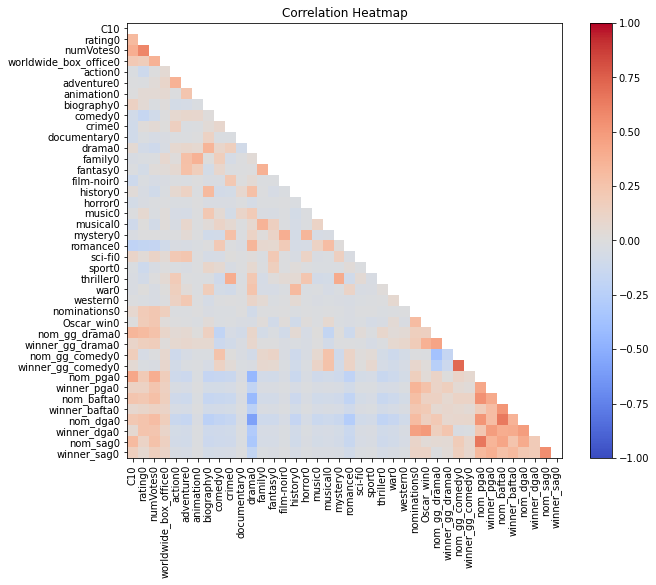

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the correlation matrix stored in a variable called 'correlation_matrix'

# Convert the correlation matrix to a numeric format
correlation_matrix = correlations.as_data_frame().values.astype(float)
column_names=correlations.columns

# Create a masked array from the correlation matrix to hide the upper triangle
masked_corr = np.ma.masked_where(np.triu(np.ones_like(correlation_matrix, dtype=bool)), correlation_matrix)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap
heatmap = ax.imshow(masked_corr, cmap='coolwarm', vmin=-1, vmax=1)

# Add a colorbar
cbar = fig.colorbar(heatmap)

# Set the axis labels
ax.set_xticks(np.arange(correlation_matrix.shape[1]))
ax.set_yticks(np.arange(correlation_matrix.shape[0]))
ax.set_xticklabels(column_names, rotation=90)
ax.set_yticklabels(column_names)

# Set the title
ax.set_title("Correlation Heatmap")

# Show the plot
plt.show()


In [ ]:
model = h2o.load_model('./additional_data/model/DeepLearning_grid_2_AutoML_6_20230519_91906_model_4')

## Predict the winner

In [13]:
# Predict on 2019's films
test = full_table.loc[(full_table['year'] == 2021)]

# Import a binary outcome train/test set into H2O
test = h2o.H2OFrame(test)

# For binary classification, response should be a factor
test[y] = test[y].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [14]:
preds = top_model.predict(test)

preds

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.999976,2.37118e-05
1,0.00165605,0.998344
0,0.995174,0.00482619
0,1,1.74511e-07
0,0.995249,0.00475117
0,0.999972,2.78123e-05
0,0.999979,2.0885e-05
0,1,9.07248e-09
0,0.999955,4.5392e-05
0,0.999999,1.10776e-06


In [15]:
test['pred'] = preds['predict']
test['probA'] = preds['p1']
test_pd = test.as_data_frame(use_pandas=True)

In [16]:
final_rankings = test_pd[['film','probA']].sort_values('probA', ascending = False)
final_rankings['%_confidence'] = final_rankings['probA']/final_rankings['probA'].sum() * 100
final_rankings

,film,probA,%_confidence
1,CODA,9.983440e-01,9.903809e+01
2,Belfast,4.826187e-03,4.787692e-01
4,Drive My Car,4.751175e-03,4.713278e-01
8,Nightmare Alley,4.539204e-05,4.502998e-03
5,Dune,2.781235e-05,2.759051e-03
0,West Side Story,2.371181e-05,2.352268e-03
6,King Richard,2.088495e-05,2.071837e-03
9,The Power of the Dog,1.107759e-06,1.098923e-04
3,Don't Look Up,1.745112e-07,1.731192e-05
7,Licorice Pizza,9.072485e-09,9.000120e-07


# And the Oscar goes to...

In [ ]:
bp_winner = np.array(final_rankings.reset_index())[0][1].split('(')[0].strip()
print(f'And the Oscar goes to...\n🎉🏆{bp_winner}🏆🎉')